In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
raw_data = pd.read_csv('data/tweets.csv', encoding='latin1')
raw_data.columns = ['text', 'product', 'target']
raw_data.dropna(subset=['text'], inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
raw_X = raw_data['text']
raw_y = raw_data['target']
raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(raw_X, raw_y, random_state=112221, stratify=raw_y)

# Baseline Model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

cv = CountVectorizer()
baseline_model = LogisticRegression(max_iter=1000, random_state=112221)

baseline_pipeline = Pipeline(steps=[('vectorizer', cv), ('baseline', baseline_model)])
baseline_pipeline.fit(raw_X_train, raw_y_train)

baseline_y_pred = baseline_pipeline.predict(raw_X_test)
accuracy_score(raw_y_test, baseline_y_pred)

0.677078750549934

In [108]:
metric_table = pd.DataFrame(columns=['Name', 'Accuracy'])

In [109]:
a = {'Name': 'Baseline Model', 'Accuracy': 0.677078750549934}
metric_table = metric_table.append(a, ignore_index = True)

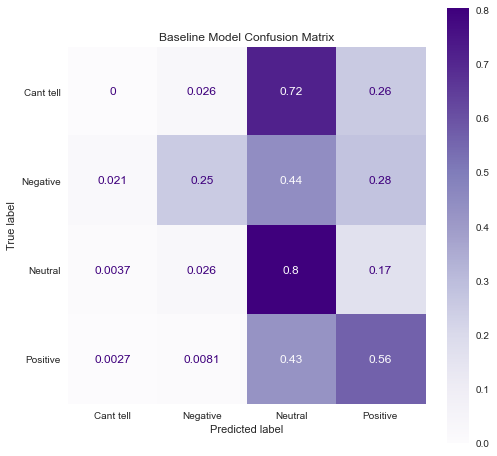

In [74]:
from sklearn.metrics import plot_confusion_matrix
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(baseline_pipeline, raw_X_test, raw_y_test, display_labels=['Cant tell', 'Negative', 'Neutral', 'Positive'], ax=ax, normalize='true', cmap='Purples')
plt.title('Baseline Model Confusion Matrix')
plt.grid(False)
plt.show()

# Preprocessed Data

In [19]:
clean_data = pd.read_csv('data/no_hashtags.csv')

In [20]:
clean_X = clean_data['text']
clean_y = clean_data['target']
clean_X_train, clean_X_test, clean_y_train, clean_y_test = train_test_split(clean_X, clean_y, random_state=112221, stratify=clean_y)

In [76]:
preprocessed_pipeline = Pipeline(steps=[('vectorizer', cv), ('baseline', baseline_model)])
preprocessed_pipeline.fit(clean_X_train, clean_y_train)

clean_y_pred = preprocessed_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, clean_y_pred)

0.6977463543968184

In [110]:
b = {'Name': 'Preprocessed Data', 'Accuracy': 0.6977463543968184}
metric_table = metric_table.append(b, ignore_index = True)

In [25]:
from sklearn.model_selection import GridSearchCV

lr_grid = {'baseline__C':[0.001, 0.1, 1], 'baseline__solver':['lbfgs', 'saga'], 'baseline__fit_intercept':[True, False]}
lr_gridsearch = GridSearchCV(estimator=baseline_pipeline, param_grid=lr_grid, scoring='accuracy', cv=5)
lr_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {lr_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {lr_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {lr_gridsearch.best_params_}')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear

Cross validation scores: [0.61102102 0.61102102 0.61293701 0.61293701 0.67717796 0.67717796
 0.67776651 0.67776651 0.68218434 0.68203707 0.67879408 0.67879408]
Best cross validation score: 68.22%
Optimal parameters: {'baseline__C': 1, 'baseline__fit_intercept': True, 'baseline__solver': 'lbfgs'}


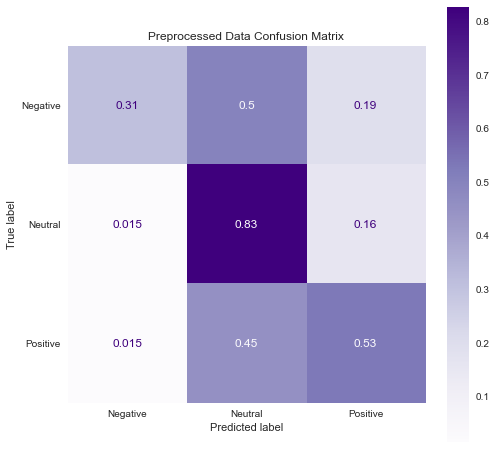

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(preprocessed_pipeline, clean_X_test, clean_y_test, display_labels=['Negative', 'Neutral', 'Positive'], ax=ax, normalize='true', cmap='Purples')
plt.title('Preprocessed Data Confusion Matrix')
plt.grid(False)
plt.show()

# TF-IDF Vectorizer

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False)

tuned_pipeline = Pipeline(steps=[('tfidf', tfidf), ('baseline', baseline_model)])
tuned_pipeline.fit(clean_X_train, clean_y_train)

tuned_y_pred = tuned_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, tuned_y_pred)

0.7061422889969068

In [111]:
c = {'Name': 'TF-IDF Vectorizer', 'Accuracy': 0.7061422889969068}
metric_table = metric_table.append(c, ignore_index = True)

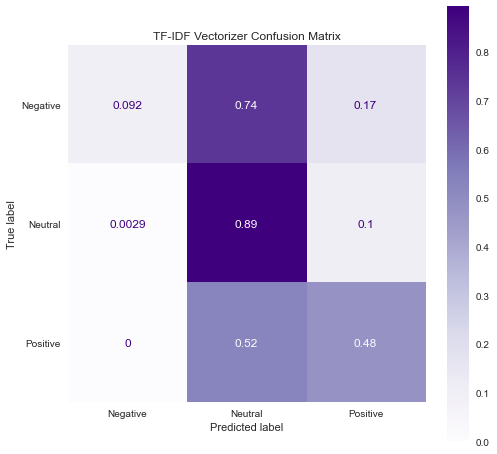

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(tuned_pipeline, clean_X_test, clean_y_test, display_labels=['Negative', 'Neutral', 'Positive'], ax=ax, normalize='true', cmap='Purples')
plt.title('TF-IDF Vectorizer Confusion Matrix')
plt.grid(False)
plt.show()

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=112221)

dt_pipeline = Pipeline(steps=[('tfidf', tfidf), ('dt', dt_model)])
dt_pipeline.fit(clean_X_train, clean_y_train)

dt_y_pred = dt_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, dt_y_pred)

0.6137870083959346

In [112]:
d = {'Name': 'Decision Tree', 'Accuracy': 0.6137870083959346}
metric_table = metric_table.append(d, ignore_index = True)

In [83]:
dt_grid = {
    'dt__criterion':['gini', 'entropy'],
    'dt__splitter':['best', 'random'],
    'dt__max_depth':[2, 6, 10, 15],
    'dt__min_samples_split': [5, 10],
    'dt__min_samples_leaf': [3, 6],
}

dt_gridsearch = GridSearchCV(estimator=dt_pipeline, param_grid=dt_grid, scoring='accuracy', cv=5)
dt_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {dt_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {dt_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {dt_gridsearch.best_params_}')

Cross validation scores: [0.61691355 0.61485268 0.61691355 0.61485268 0.61691355 0.61485268
 0.61691355 0.61485268 0.62693219 0.62708164 0.62752151 0.62811245
 0.62722739 0.62958586 0.62722739 0.62958586 0.62428134 0.63312351
 0.6236917  0.63253376 0.62442927 0.63636357 0.62442927 0.63636357
 0.62487218 0.6353309  0.62442992 0.63827836 0.61661911 0.62899567
 0.61661911 0.62899567 0.61720832 0.61441085 0.61720832 0.61441085
 0.61720832 0.61441085 0.61720832 0.61441085 0.62589996 0.62855244
 0.62589996 0.62634265 0.62663666 0.6289948  0.62663666 0.6289948
 0.62811028 0.62693295 0.62796268 0.63046897 0.62604789 0.63577262
 0.62604789 0.63577262 0.62236578 0.62885024 0.6220708  0.62958586
 0.61676747 0.63562578 0.61676747 0.63562578]
Best cross validation score: 63.83%
Optimal parameters: {'dt__criterion': 'gini', 'dt__max_depth': 15, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 10, 'dt__splitter': 'random'}


In [84]:
tuned_dt_model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=10, splitter='random', random_state=112221)

tuned_dt_pipeline = Pipeline(steps=[('tfidf', tfidf), ('tuned_dt', tuned_dt_model)])
tuned_dt_pipeline.fit(clean_X_train, clean_y_train)

tuned_dt_y_pred = tuned_dt_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, tuned_dt_y_pred)

0.6411842686699072

In [113]:
e = {'Name': 'Tuned Decision Tree', 'Accuracy': 0.6411842686699072}
metric_table = metric_table.append(e, ignore_index = True)

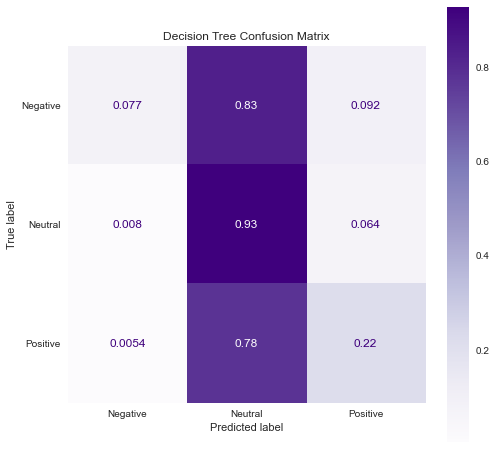

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(tuned_dt_pipeline, clean_X_test, clean_y_test, display_labels=['Negative', 'Neutral', 'Positive'], ax=ax, normalize='true', cmap='Purples')
plt.title('Decision Tree Confusion Matrix')
plt.grid(False)
plt.show()

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [87]:
rf_model = RandomForestClassifier(random_state=112221)

rf_pipeline = Pipeline(steps=[('tfidf', tfidf), ('rf', rf_model)])
rf_pipeline.fit(clean_X_train, clean_y_train)

rf_y_pred = rf_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, rf_y_pred)

0.6818382677861247

In [114]:
f = {'Name': 'Random Forest', 'Accuracy': 0.6818382677861247}
metric_table = metric_table.append(f, ignore_index = True)

In [88]:
rf_grid = {
    'rf__n_estimators':[10, 30, 100],
    'rf__criterion':['gini', 'entropy'],
    'rf__max_depth':[None, 2, 6, 10],
    'rf__min_samples_split':[5, 10],
    'rf__min_samples_leaf':[3, 6]
}

rf_gridsearch = GridSearchCV(estimator=rf_pipeline, param_grid=rf_grid, scoring='accuracy', cv=5)
rf_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {rf_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {rf_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {rf_gridsearch.best_params_}')

Cross validation scores: [0.65360293 0.66096854 0.66774712 0.65404649 0.6631793  0.66730551
 0.64211024 0.64314334 0.64093182 0.64211024 0.64314334 0.64093182
 0.6104317  0.60954761 0.60954761 0.6104317  0.60954761 0.60954761
 0.60998987 0.60954761 0.60954761 0.60998987 0.60954761 0.60954761
 0.613526   0.61352579 0.61131546 0.61323124 0.61352579 0.61161001
 0.61264224 0.61323124 0.61146285 0.61264224 0.61323124 0.61146285
 0.61470507 0.61529374 0.6154408  0.61514668 0.61514636 0.6154408
 0.61529396 0.61455704 0.61485137 0.61529396 0.61455704 0.61485137
 0.65095143 0.65831824 0.65979154 0.64933129 0.65802369 0.66141232
 0.63548209 0.63606923 0.63651149 0.63548209 0.63606923 0.63651149
 0.61013715 0.60954761 0.60954761 0.61013715 0.60954761 0.60954761
 0.61013715 0.60954761 0.60954761 0.61013715 0.60954761 0.60954761
 0.61382034 0.61205216 0.61102091 0.61440987 0.61219955 0.61087353
 0.61337829 0.61161001 0.61072647 0.61337829 0.61161001 0.61072647
 0.61558851 0.61573579 0.61470432 0.61

In [89]:
rf_tuned_grid = {
    'rf__max_depth': [None, 8, 12], 
    'rf__min_samples_leaf':[1, 2, 3], 
    'rf__min_samples_split': [10, 15], 
    'rf__n_estimators': [100, 150]
}

rf_tuned_gridsearch = GridSearchCV(estimator=rf_pipeline, param_grid=rf_tuned_grid, scoring='accuracy', cv=5)
rf_tuned_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {rf_tuned_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {rf_tuned_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {rf_tuned_gridsearch.best_params_}')

Cross validation scores: [0.67982859 0.67968066 0.67702949 0.68218575 0.67614638 0.67806139
 0.67599899 0.6780615  0.66730551 0.67039916 0.66789494 0.66951508
 0.61337819 0.61367252 0.6139675  0.61381969 0.6132308  0.61352503
 0.6132308  0.61352503 0.61308342 0.61352503 0.61367274 0.61352503
 0.61706116 0.61720876 0.61706137 0.61661944 0.61632478 0.61632478
 0.61647205 0.61632478 0.61647205 0.61632478 0.61632467 0.61603001]
Best cross validation score: 68.22%
Optimal parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 15, 'rf__n_estimators': 150}


In [92]:
rf_tuned_grid_1 = {  
    'rf__min_samples_split': [15, 20, 25], 
    'rf__n_estimators': [150, 200, 300]
}

rf_tuned_gridsearch_1 = GridSearchCV(estimator=rf_pipeline, param_grid=rf_tuned_grid_1, scoring='accuracy', cv=5)
rf_tuned_gridsearch_1.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {rf_tuned_gridsearch_1.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {rf_tuned_gridsearch_1.best_score_ :.2%}')
print(f'Optimal parameters: {rf_tuned_gridsearch_1.best_params_}')

Cross validation scores: [0.68218575 0.68189001 0.68159492 0.68365862 0.68085886 0.68233216
 0.68218543 0.68130178 0.68203848]
Best cross validation score: 68.37%
Optimal parameters: {'rf__min_samples_split': 20, 'rf__n_estimators': 150}


In [93]:
tuned_rf_model = RandomForestClassifier(min_samples_split=20, n_estimators=150, random_state=112221)

tuned_rf_pipeline = Pipeline(steps=[('tfidf', tfidf), ('tuned_rf', tuned_rf_model)])
tuned_rf_pipeline.fit(clean_X_train, clean_y_train)

tuned_rf_y_pred = tuned_rf_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, tuned_rf_y_pred)

0.6831639416703491

In [115]:
metric_table

,Name,Accuracy
0,Baseline Model,0.677079
1,Preprocessed Data,0.697746
2,TF-IDF Vectorizer,0.706142
3,Decision Tree,0.613787
4,Tuned Decision Tree,0.641184
5,Random Forest,0.681838


In [116]:
g = {'Name': 'Tuned Random Forest', 'Accuracy': 0.6831639416703491}
metric_table = metric_table.append(g, ignore_index = True)

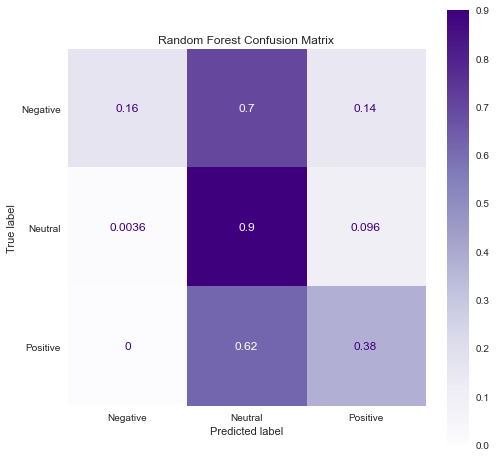

In [94]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(tuned_rf_pipeline, clean_X_test, clean_y_test, display_labels=['Negative', 'Neutral', 'Positive'], ax=ax, normalize='true', cmap='Purples')
plt.title('Random Forest Confusion Matrix')
plt.grid(False)
plt.show()

# Extra Trees

In [95]:
et_model = ExtraTreesClassifier(random_state=112221)

et_pipeline = Pipeline(steps=[('tfidf', tfidf), ('et', et_model)])
et_pipeline.fit(clean_X_train, clean_y_train)

et_y_pred = rf_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, et_y_pred)

0.6818382677861247

In [117]:
h = {'Name': 'Extra Trees', 'Accuracy': 0.6818382677861247}
metric_table = metric_table.append(h, ignore_index = True)

In [96]:
et_grid = {
    'et__n_estimators':[10, 30, 100],
    'et__criterion':['gini', 'entropy'],
    'et__max_depth':[None, 2, 6, 10],
    'et__min_samples_split':[5, 10],
    'et__min_samples_leaf':[3, 6]
}

et_gridsearch = GridSearchCV(estimator=et_pipeline, param_grid=et_grid, scoring='accuracy', cv=5)
et_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {et_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {et_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {et_gridsearch.best_params_}')

Cross validation scores: [0.67143215 0.67216799 0.67585139 0.66848491 0.67378899 0.67703079
 0.64461359 0.64343669 0.64638383 0.64461359 0.64343669 0.64638383
 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761
 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761
 0.609695   0.61087353 0.60954761 0.609695   0.61013715 0.60954761
 0.61116775 0.61087342 0.60954761 0.61116775 0.61087342 0.60954761
 0.61308363 0.61455661 0.61440933 0.61278887 0.61411467 0.61485137
 0.61190424 0.61308309 0.61308353 0.61190424 0.61308309 0.61308353
 0.65728655 0.66553788 0.66391687 0.65875974 0.66671587 0.66715802
 0.6400473  0.63813239 0.63783806 0.6400473  0.63813239 0.63783806
 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761
 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761 0.60954761
 0.61205216 0.61131568 0.60954761 0.61190478 0.61131568 0.60954761
 0.6116099  0.61102037 0.609695   0.6116099  0.61102037 0.609695
 0.61426271 0.61352568 0.61367317 0.614

In [98]:
et_tuned_grid = {
    'et__n_estimators':[100, 150, 200],
    'et__min_samples_split':[10, 15],
    'et__min_samples_leaf':[1, 2, 3]
}

et_tuned_gridsearch = GridSearchCV(estimator=et_pipeline, param_grid=et_tuned_grid, scoring='accuracy', cv=5)
et_tuned_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {et_tuned_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {et_tuned_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {et_tuned_gridsearch.best_params_}')

Cross validation scores: [0.686754   0.68704812 0.68778504 0.68365927 0.68557558 0.68498561
 0.67894537 0.68056659 0.6793873  0.67806096 0.68056594 0.68041856
 0.67703079 0.67673591 0.67540978 0.67599845 0.67526218 0.67437831]
Best cross validation score: 68.78%
Optimal parameters: {'et__min_samples_leaf': 1, 'et__min_samples_split': 10, 'et__n_estimators': 200}


In [99]:
et_tuned_grid = {
    'et__n_estimators':[200, 250, 300],
    'et__min_samples_split':[10],
}

et_tuned_gridsearch = GridSearchCV(estimator=et_pipeline, param_grid=et_tuned_grid, scoring='accuracy', cv=5)
et_tuned_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {et_tuned_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {et_tuned_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {et_tuned_gridsearch.best_params_}')

Cross validation scores: [0.68778504 0.68572232 0.68793221]
Best cross validation score: 68.79%
Optimal parameters: {'et__min_samples_split': 10, 'et__n_estimators': 300}


In [100]:
et_tuned_grid_1 = {
    'et__n_estimators':[300, 400, 500],
    'et__min_samples_split':[10],
}

et_tuned_gridsearch_1 = GridSearchCV(estimator=et_pipeline, param_grid=et_tuned_grid_1, scoring='accuracy', cv=5)
et_tuned_gridsearch_1.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {et_tuned_gridsearch_1.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {et_tuned_gridsearch_1.best_score_ :.2%}')
print(f'Optimal parameters: {et_tuned_gridsearch_1.best_params_}')

Cross validation scores: [0.68793221 0.68660575 0.68645869]
Best cross validation score: 68.79%
Optimal parameters: {'et__min_samples_split': 10, 'et__n_estimators': 300}


In [123]:
tuned_et_model = ExtraTreesClassifier(min_samples_split=10, n_estimators=300, random_state=112222)

tuned_et_pipeline = Pipeline(steps=[('tfidf', tfidf), ('tuned_et', tuned_et_model)])
tuned_et_pipeline.fit(clean_X_train, clean_y_train)

tuned_et_y_pred = tuned_et_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, tuned_et_y_pred)

0.690234202386213

# HERE

In [124]:
i = {'Name': 'Tuned Extra Trees', 'Accuracy': 0.6924436588599204}
metric_table = metric_table.append(i, ignore_index = True)

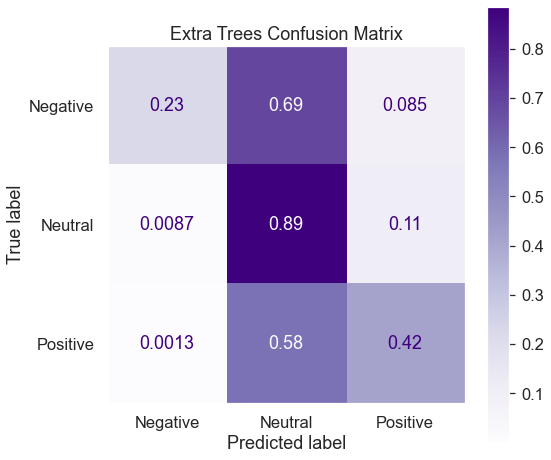

In [107]:
sns.set_theme(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(tuned_et_pipeline, clean_X_test, clean_y_test, display_labels=['Negative', 'Neutral', 'Positive'], ax=ax, normalize='true', cmap='Purples')
plt.title('Extra Trees Confusion Matrix')
plt.grid(False)
plt.show()

# Gradient Boosting

In [103]:
gb_model = GradientBoostingClassifier(random_state=112221)

gb_pipeline = Pipeline(steps=[('tfidf', tfidf), ('gb', gb_model)])
gb_pipeline.fit(clean_X_train, clean_y_train)

gb_y_pred = gb_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, gb_y_pred)

0.6699072028281042

In [126]:
j = {'Name': 'Gradient Boosting', 'Accuracy': 0.6699072028281042}
metric_table = metric_table.append(j, ignore_index = True)

In [131]:
metric_table.drop(10)

,Name,Accuracy
0,Baseline Model,0.677079
1,Preprocessed Data,0.697746
2,TF-IDF Vectorizer,0.706142
3,Decision Tree,0.613787
4,Tuned Decision Tree,0.641184
5,Random Forest,0.681838
6,Tuned Random Forest,0.683164
7,Extra Trees,0.681838
8,Tuned Extra Trees,0.692444
9,Gradient Boosting,0.669907


In [128]:
%store metric_table

Stored 'metric_table' (DataFrame)


In [104]:
gb_grid = {
    'gb__loss': ['deviance', 'exponential'],
    'gb__n_estimators':[10, 30, 100],
    'gb__criterion':['friedman_mse', 'squared_error'],
    'gb__max_depth':[2, 6, 10],
    'gb__min_samples_split':[5, 10],
    'gb__min_samples_leaf':[3, 6]
}

gb_gridsearch = GridSearchCV(estimator=gb_pipeline, param_grid=gb_grid, scoring='accuracy', cv=5)
gb_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {gb_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {gb_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {gb_gridsearch.best_params_}')

Cross validation scores: [0.61912345 0.63459333 0.65566544 0.61912345 0.63459333 0.65581304
 0.61971255 0.6337099  0.65433974 0.61971255 0.6337099  0.65433974
 0.64240316 0.65743318 0.6752624  0.64137158 0.65875909 0.67938752
 0.64210915 0.65920135 0.67496687 0.64210915 0.65920135 0.67496687
 0.65271711 0.66612601 0.67909232 0.65080198 0.66598014 0.67717676
 0.65124392 0.66715704 0.67762087 0.65124392 0.66715704 0.67762087
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan    

In [105]:
gb_tuned_grid = {
    'gb__loss': ['deviance'],
    'gb__n_estimators':[200, 300],
    'gb__criterion':['friedman_mse'],
    'gb__max_depth':[5, 6, 7],
    'gb__min_samples_split':[10, 15],
    'gb__min_samples_leaf':[1, 2, 3]
}

gb_tuned_gridsearch = GridSearchCV(estimator=gb_pipeline, param_grid=gb_tuned_grid, scoring='accuracy', cv=5)
gb_tuned_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {gb_tuned_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {gb_tuned_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {gb_tuned_gridsearch.best_params_}')

Cross validation scores: [0.67850398 0.68336613 0.67673678 0.68321972 0.67732501 0.67732545
 0.67879864 0.67909286 0.68041953 0.68086049 0.67820943 0.68027237
 0.68071343 0.68159795 0.680713   0.6838073  0.67776782 0.67747251
 0.67747251 0.67923992 0.68380839 0.67747283 0.67938752 0.6805667
 0.68262899 0.68012357 0.67865093 0.6767345  0.67923959 0.67864952
 0.67879799 0.67909232 0.6832169  0.67968142 0.68263008 0.6814497 ]
Best cross validation score: 68.38%
Optimal parameters: {'gb__criterion': 'friedman_mse', 'gb__loss': 'deviance', 'gb__max_depth': 6, 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 10, 'gb__n_estimators': 200}


In [132]:
tuned_gb_model = GradientBoostingClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200, random_state=112222)

tuned_gb_pipeline = Pipeline(steps=[('tfidf', tfidf), ('tuned_et', tuned_gb_model)])
tuned_gb_pipeline.fit(clean_X_train, clean_y_train)

tuned_gb_y_pred = tuned_gb_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, tuned_gb_y_pred)

0.6813963764913831

In [133]:
z = {'Name': 'Tuned Gradient Boosting', 'Accuracy': 0.6818382677861247}
metric_table = metric_table.append(z, ignore_index = True)

In [135]:
metric_table = metric_table.drop(10).reset_index(drop=True)

In [138]:
metric_table

,Name,Accuracy
0,Baseline Model,0.677079
1,Preprocessed Data,0.697746
2,TF-IDF Vectorizer,0.706142
3,Decision Tree,0.613787
4,Tuned Decision Tree,0.641184
5,Random Forest,0.681838
6,Tuned Random Forest,0.683164
7,Extra Trees,0.681838
8,Tuned Extra Trees,0.692444
9,Gradient Boosting,0.669907


In [139]:
z = {'Name': 'SGD', 'Accuracy': 0.7140963323022537}
metric_table = metric_table.append(z, ignore_index = True)

In [140]:
y = {'Name': 'Tuned SGD', 'Accuracy': 0.7140963323022537}
metric_table = metric_table.append(y, ignore_index = True)

In [141]:
a = {'Name': 'Neural Network', 'Accuracy': 0.64}
metric_table = metric_table.append(a, ignore_index = True)

In [142]:
b = {'Name': 'Tuned Neural Network', 'Accuracy': 0.67}
metric_table = metric_table.append(b, ignore_index = True)

In [149]:
%store metric_table

Stored 'metric_table' (DataFrame)


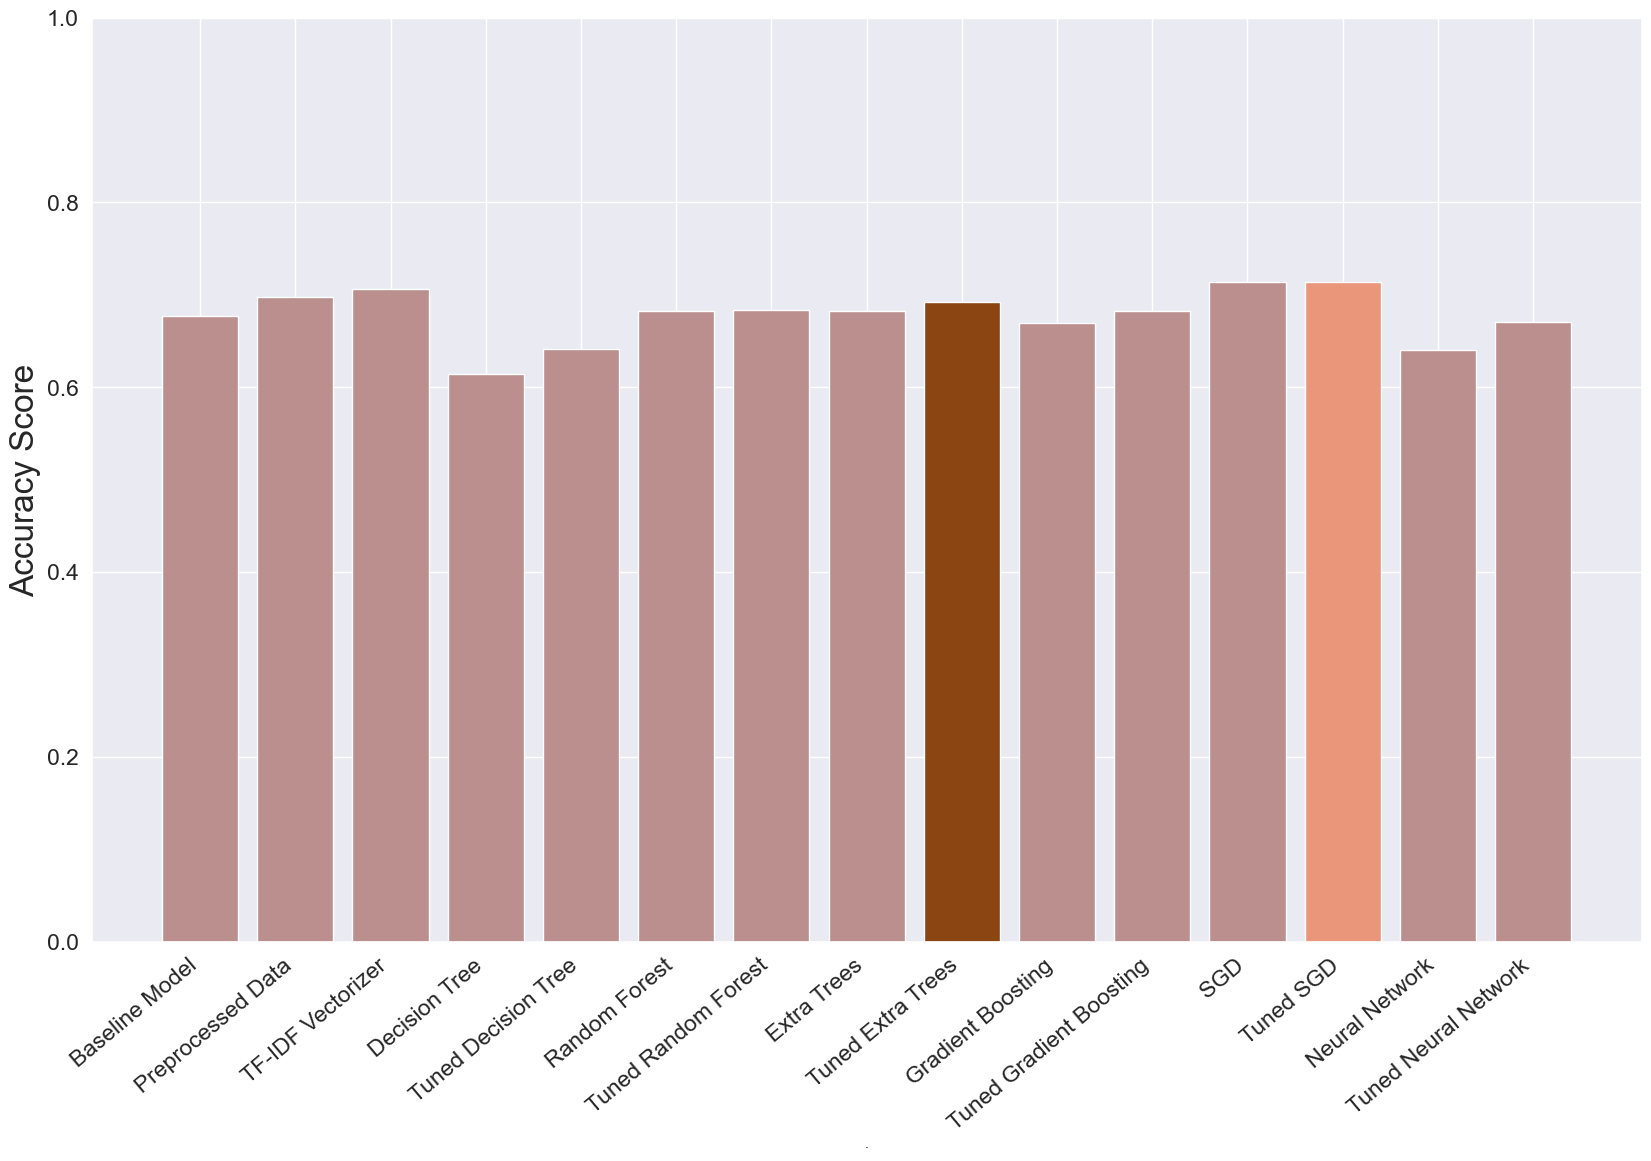

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

sns.set_theme(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 12))

c = ['rosybrown', 'rosybrown', 'rosybrown', 'rosybrown', 
     'rosybrown', 'rosybrown', 'rosybrown', 'rosybrown', 'saddlebrown', 
     'rosybrown', 'rosybrown', 'rosybrown', 'darksalmon', 'rosybrown', 'rosybrown',]

plt.bar(metric_table['Name'], metric_table['Accuracy'], color=c)

#ax.set_title('Model Improvements', fontsize=20)

ax.set_xlabel('.', fontsize=10)
plt.xticks(rotation=40, ha='right')
plt.ylim(0, 1)
ax.set_ylabel('Accuracy Score', fontsize=24)

#plt.grid(linestyle = '--', linewidth = 0.5, alpha=.5, zorder=0)

plt.show()

In [137]:
%store metric_table

Stored 'metric_table' (DataFrame)


# Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_model = SGDClassifier(random_state=112221)

sgd_pipeline = Pipeline(steps=[('tfidf', tfidf), ('sgd', sgd_model)])
sgd_pipeline.fit(clean_X_train, clean_y_train)

sgd_y_pred = sgd_pipeline.predict(clean_X_test)
accuracy_score(clean_y_test, sgd_y_pred)

In [ ]:
sgd_grid = {
    'gb__loss': ['deviance', 'exponential'],
    'gb__n_estimators':[10, 30, 100],
    'gb__criterion':['friedman_mse', 'squared_error'],
    'gb__max_depth':[2, 6, 10],
    'gb__min_samples_split':[5, 10],
    'gb__min_samples_leaf':[3, 6]
}

sgd_gridsearch = GridSearchCV(estimator=sgd_pipeline, param_grid=sgd_grid, scoring='accuracy', cv=5)
sgd_gridsearch.fit(clean_X_train, clean_y_train)

print(f'Cross validation scores: {sgd_gridsearch.cv_results_["mean_test_score"]}')
print(f'Best cross validation score: {sgd_gridsearch.best_score_ :.2%}')
print(f'Optimal parameters: {sgd_gridsearch.best_params_}')